# [*Lab Project Part 2*]() CNNs for Image Classification
------------------------------

### General Guideline
1. Aim:
    - *Understand  the  basic  Image  Classification/Recognition  pipeline  and  the  data-driven  approach (train/predict stages).*
    - *Get used to one of deep learning framework(Pytorch).*
2. Prerequisite:
    - *Familiar with python and relevant packages.*
    - *Known the basic knowledge of Convolutional Neural Networks*

### PyTorch versions
we assume that you are using latest PyTorch version(>=1.4)

### PyTorch Tutorial & Docs
You can learn pytorch from the [tutorial link](https://pytorch.org/tutorials/). The Docs information can be searched at [Docs](https://pytorch.org/docs/stable/index.html). In this assignments, we wish you to form the basic capability of using one of the well-known  

## Session 1: Image Classifiation on CIFAR 10
### Install pytorch and run the given codes

In [29]:
#####################################################
# referenced codes: https://pytorch.org/tutorials/
# referenced codes: http://cs231n.stanford.edu/
# referenced codes: https://cs.stanford.edu/~acoates/stl10/
######################################################
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import os
from torch.utils.data import DataLoader

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified


####  *` Q2.1: test dataloader and show the images of each class  of CIFAR10`*  

In [9]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

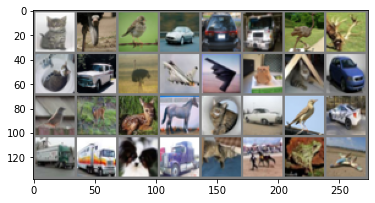

  cat  bird  bird   car


In [10]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

####  *` Q2.2: Architecture understanding. Implement architecture of TwolayerNet and ConvNet.`*  

In [11]:
class TwolayerNet(nn.Module):
    # assign layer objects to class attributes
    # nn.init package contains convenient initialization methods
    # http://pytorch.org/docs/master/nn.html#torch-nn-init
    def __init__(self,input_size ,hidden_size ,num_classes ):
        '''
        :param input_size: 3*32*32
        :param hidden_size: 
        :param num_classes: 
        '''
        super(TwolayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self,x):
        # flatten
        x = x.view(x.shape[0], -1)
        scores = self.fc2(F.relu(self.fc1(x)))
        return scores


In [12]:
class ConvNet(nn.Module):
    # Complete the code using LeNet-5
    # reference: https://ieeexplore.ieee.org/document/726791
    def __init__(self, n_classes):
        super(ConvNet, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1)
        self.pool1 = nn.AvgPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.pool2 = nn.AvgPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1)
        self.lin1 = nn.Linear(in_features=120, out_features=84)
        self.lin2 = nn.Linear(in_features=84, out_features=n_classes)
        
    def forward(self, x):
        x = torch.tanh(self.conv1(x))
        x = torch.tanh(self.conv2(self.pool1(x)))
        x = torch.tanh(self.conv3(self.pool2(x)))
        x = torch.flatten(x, 1)
        x = torch.tanh(self.lin1(x))
        scores = self.lin2(x)
        #probs = F.softmax(logits, dim=1)
        return scores

In [13]:
def train(net, trainloader,epoch=1):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(),lr=0.0001) 
    
    epoch_losses = []
    for ep in range(epoch):  
        print('Now starting epoch {}'.format(ep+1))
        epoch_loss = 0
        for i, (x, y) in enumerate(trainloader): 

            outputs = net(x)
            loss = criterion(outputs, y)
            epoch_loss += loss.item()

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        print('Epoch loss was {0:1.2f}'.format(epoch_loss/(i+1)))
        epoch_losses.append(epoch_loss/(i+1))
    
    plt.title('Learning Curve for Model')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy Loss')
    plt.xticks(np.arange(0, epoch))
    plt.plot(np.arange(0,epoch,1),epoch_losses,label="train")
    plt.legend()
    plt.show()
    print('Finished Training')

####  Train Two-layer Net

Now starting epoch 1
Epoch loss was 1.86
Now starting epoch 2
Epoch loss was 1.70
Now starting epoch 3
Epoch loss was 1.65


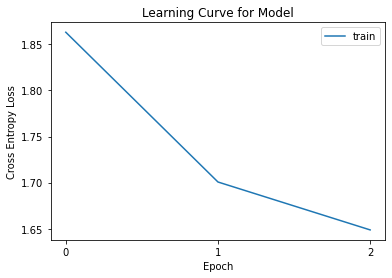

Finished Training


In [14]:
twolayernet = TwolayerNet((3*32*32), 20, 10)
train(twolayernet, trainloader, epoch=3)

#### Train ConvNet

Now starting epoch 1
Epoch loss was 1.94
Now starting epoch 2
Epoch loss was 1.79
Now starting epoch 3
Epoch loss was 1.71


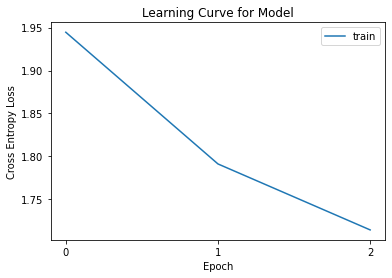

Finished Training


In [16]:
convnet = ConvNet(10)
train(convnet, trainloader, epoch=3)

In [138]:
def valid(net,testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
            100 * correct / total))

In [115]:
def valid_class(net,testloader,classes):
    class_correct = list(0. for i in range(len(classes)))
    class_total = list(0. for i in range(len(classes)))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(len(classes)):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

####  *` Q2.3: Preparation of training. Create Dataloader yourself and define Transform, optimizer.`*  

#### *` Complement  CIFAR10_loader()`*

In [127]:
###  suggested reference: https://pytorch.org/tutorials/
# recipes/recipes/custom_dataset_transforms_loader.html?highlight=dataloader
# functions to show an image
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from six.moves import cPickle

class CIFAR10_loader(Dataset):
    def __init__(self,root,train=True,transform = None):
        
        ###
        
        # load data from file
        f = open(root, 'rb')
        data = cPickle.load(f,encoding='latin1')
        f.close()
        
        # save data in data frame
        data.pop('batch_label', None)
        self.data = pd.DataFrame.from_dict(data,orient='index').T
        
        # save path to file
        self.root = root
        
        # save transformation for getitem
        self.transform = transform
        
        ###

    def __len__(self):
        return len(self.data)

    def __getitem__(self, item):
        
        ###
        
        # get image and label
        img = self.data.loc[item,'data']/255.0
        target = self.data.loc[item, 'labels']
        
        
        img = torch.Tensor(img.reshape(3,32,32))
        target = torch.tensor(target, dtype=torch.int64)
        
        # apply transformation on data set
        if self.transform:
            img = self.transform(img)
           
        ###
        
        return img, target

      
        

#path_batch1 = "./data/cifar-10-batches-py/data_batch_1"
#dataset = CIFAR10_loader(path_batch1)
#imshow(dataset[3][0])

#### *` Complement Transform function and Optimizer`*

In [128]:
transform_train = transforms.Compose([transforms.ToPILImage(), transforms.RandomAffine(90), transforms.ToTensor()]) # random affine transformation in range (-90, +90) degree

transform_test = None#transforms.Compose([transforms.ToPILImage(), transforms.RandomAffine(90), transforms.ToTensor()])

optimizer = optim.Adam

#### *` Train the ConvNet with CIFAR10_loader, transform and optimizer you implemented and compare the results`*

In [132]:
def train(net, trainloader,epoch=1):
    ###################### Define Loss function and optimizer
    
    ###
    
    # set up optimizer and loss function
    opt = optimizer(net.parameters(), lr=3e-4)
    criterion = nn.CrossEntropyLoss()
    
    ###
    
    ############################### Training
    for ep in range(epoch):  # loop over the dataset multiple times 

        ################################
         
        print('Now starting epoch {}'.format(ep+1))
        epoch_loss = 0
        for i, (x, y) in enumerate(trainloader): 
            
            # forwards
            outputs = net(x)
            
            # compute loss
            loss = criterion(outputs, y)
            epoch_loss += loss.item()

            # Backward and optimize
            opt.zero_grad()
            loss.backward()
            opt.step()
        
        print('Epoch loss was {0:1.2f}'.format(epoch_loss/(i+1)))
        
        ################################

    print('Finished Training')

#### *` Q2.4 Setting up the hyperparameters.`*

#### *`Play with convNet and TwolayerNet, set up the hyperparameters and reach the accuracy as high as you can`*

In [133]:
################################
# Todo: finish the code
################################
batch_files = ['./data/cifar-10-batches-py/data_batch_' + str(i) for i in range(1,6,1)]

epoch_per_batch = 2    

In [134]:
# Training Two Layer Net
two_layer_net = TwolayerNet((3*32*32), 20, 10)

print('Now training Two Layer Net')
for i in range(5):
    print('Now training on batch {}'.format(i+1))
    
    # set up dataset and loader
    transformed_dataset = CIFAR10_loader(batch_files[i], transform = transform_train)
    trainloader = DataLoader(transformed_dataset, batch_size=32, shuffle=True)
    
    # train on the batch
    train(two_layer_net, trainloader, epoch=epoch_per_batch)

Now training Two Layer Net
Now training on batch 1
Now starting epoch 1
Epoch loss was 2.23
Now starting epoch 2
Epoch loss was 2.10
Finished Training
Now training on batch 2
Now starting epoch 1
Epoch loss was 2.07
Now starting epoch 2
Epoch loss was 2.05
Finished Training
Now training on batch 3
Now starting epoch 1
Epoch loss was 2.00
Now starting epoch 2
Epoch loss was 1.99
Finished Training
Now training on batch 4
Now starting epoch 1
Epoch loss was 2.00
Now starting epoch 2
Epoch loss was 1.98
Finished Training
Now training on batch 5
Now starting epoch 1
Epoch loss was 1.98
Now starting epoch 2
Epoch loss was 1.97
Finished Training


In [135]:
# Training ConvNet
conv_net = ConvNet(10)

for i in range(5):
    print('Now training on batch {}'.format(i+1))
    
    # set up dataset and loader
    transformed_dataset = CIFAR10_loader(batch_files[i], transform = transform_train)
    trainloader = DataLoader(transformed_dataset, batch_size=32, shuffle=True)
    
    # train on the batch
    train(conv_net, trainloader, epoch=epoch_per_batch)

Now training on batch 1
Now starting epoch 1
Epoch loss was 2.12
Now starting epoch 2
Epoch loss was 1.99
Finished Training
Now training on batch 2
Now starting epoch 1
Epoch loss was 1.96
Now starting epoch 2
Epoch loss was 1.92
Finished Training
Now training on batch 3
Now starting epoch 1
Epoch loss was 1.88
Now starting epoch 2
Epoch loss was 1.86
Finished Training
Now training on batch 4
Now starting epoch 1
Epoch loss was 1.86
Now starting epoch 2
Epoch loss was 1.83
Finished Training
Now training on batch 5
Now starting epoch 1
Epoch loss was 1.84
Now starting epoch 2
Epoch loss was 1.82
Finished Training


#### *` test the accuracy of ConvNet `*

In [136]:
################################
# Todo: finish the code
################################

# load data
test_path = './data/cifar-10-batches-py/test_batch'
transformed_test_dataset = CIFAR10_loader(test_path, transform=transform_test, train=False)
testloader = DataLoader(transformed_test_dataset, batch_size=32, shuffle=True)



In [139]:
# evaluate ConvNet
valid(conv_net, testloader)


Accuracy of the network on the 10000 test images: 38 %


#### *`test the accuracy of TwolayerNet`*

In [140]:
################################
# Todo: finish the code
################################

valid(two_layer_net, testloader)


Accuracy of the network on the 10000 test images: 28 %


## Session 2:  Finetuning the ConvNet
### STL-10 DATASET
> The provided network is trained on a different dataset named CIFAR-10 4 , which
contains the images of 10 different object categories, each of which has 32 ∗ 32 ∗ 3
dimensions. The dataset we use throughout the assignment is a subset of STL-10 5
with larger sizes and different object classes. So, there is a discrepancy between the
dataset we use to train (CIFAR-10) and test (STL-10) our network. One solution
would be to train the whole network from scratch. However, the number of param-
eters are too large to be trained properly with such few number of images provided.
One solution is to shift the learned weights in a way to perform well on the test
set, while preserving as much information as necessary from the training class.
### In this Session, extract 5 classes from STL training dataset , 
the the label of images can be defined as `{1: 'airplanes',2:'birds',3:'ships',4:'cats',5:'dogs'}`

#### *`Q3.1 create the STL10_Dataset `*

In [49]:
from stl10_data import *
class STL10_Dataset(Dataset):
    def __init__(self,root,train=True,transform = None):
        ################################
        # Todo: finish the code
        ################################

 

    def __len__(self):
        ################################
        # Todo: finish the code
        ################################

    def __getitem__(self, item):
        ################################
        # Todo: finish the code
        ################################

        return img, target


#### *`Q3.2  Finetuning from ConvNet & train the model and show the results`*

In [27]:
################################
# Todo: finish the code
################################

#### *`Q3.3  Feature Space Visualization`*

In [28]:
################################
# Todo: finish the code
################################

###  `Bonus`

In [52]:
pass